### **Installing Required Libraries**

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import os 
import random
import matplotlib.pyplot as plt
import pickle

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization,Activation, Convolution2D, MaxPooling2D
from keras.utils import np_utils
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [6]:
!unzip /content/drive/MyDrive/DATA/data1.zip

Archive:  /content/drive/MyDrive/DATA/data1.zip
replace data1/Q1_dataset/flower_images/Lilly/00048a5c76.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data1/Q1_dataset/flower_images/Lilly/001ff6644e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data1/Q1_dataset/flower_images/Lilly/001ff6656j.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### **DATA PREPROCESSING**

In [8]:
data1 = '/content/drive/MyDrive/data1/Q1_dataset/flower_images'
classes = ['Lilly','Lotus','Orchid','Sunflower','Tulip']

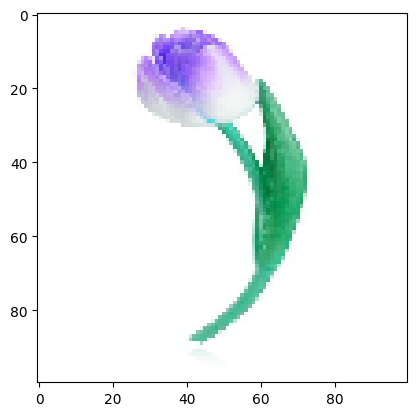

In [9]:
IMG_SIZE = 100

for category in classes:
  folder = os.path.join(data1, category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img_arr)
    break

In [10]:
IMG_SIZE = 100

data = []

for category in classes:
  folder = os.path.join(data1, category)
  label = classes.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    data.append([img_arr, label])

In [11]:
len(data)

5000

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/data1/Q1_dataset/flower_images'
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    
)

# Shuffling data
In order to make the model have a better understanding for each class, we need to shuffle the dataset

In [12]:
random.shuffle(data)

In [13]:
data[0]

[array([[[ 60,  85,  71],
         [ 55,  84,  69],
         [ 47,  85,  69],
         ...,
         [ 71,  94,  96],
         [ 73,  94,  95],
         [ 73,  95,  93]],
 
        [[ 64,  93,  78],
         [ 57,  93,  77],
         [ 51,  93,  76],
         ...,
         [ 69,  92,  94],
         [ 71,  92,  93],
         [ 72,  93,  91]],
 
        [[ 67, 102,  87],
         [ 62, 102,  86],
         [ 56, 102,  85],
         ...,
         [ 67,  88,  90],
         [ 68,  89,  88],
         [ 70,  89,  87]],
 
        ...,
 
        [[ 51, 130, 113],
         [ 52, 124, 108],
         [ 36, 106,  91],
         ...,
         [ 34,  70,  55],
         [ 29,  68,  53],
         [ 22,  64,  51]],
 
        [[ 52, 125, 109],
         [ 58, 125, 110],
         [ 37, 104,  89],
         ...,
         [ 31,  68,  52],
         [ 29,  65,  51],
         [ 26,  64,  52]],
 
        [[ 53, 120, 105],
         [ 55, 120, 105],
         [ 42, 105,  90],
         ...,
         [ 29,  67,  51],
  

--->1 at the end indicates that the image above belongs to the class Lotus

In [57]:
X = []
y = []

for features, labels in data:
  X.append(features)
  y.append(labels)

In [58]:
X = np.array(X)
y= np.array(y)

In [59]:
len(X)
len(y)

5000

In [36]:
pickle.dump(X, open('X.pkl','wb'))
pickle.dump(y, open('y.pkl', 'wb'))

### **TRAINING**

In [37]:
X = pickle.load(open('X.pkl','rb'))
y= pickle.load(open('y.pkl','rb'))

lesser the values, faster the computations (SCALING)



In [18]:
X = X/255

In [19]:
X

array([[[[0.23529412, 0.33333333, 0.27843137],
         [0.21568627, 0.32941176, 0.27058824],
         [0.18431373, 0.33333333, 0.27058824],
         ...,
         [0.27843137, 0.36862745, 0.37647059],
         [0.28627451, 0.36862745, 0.37254902],
         [0.28627451, 0.37254902, 0.36470588]],

        [[0.25098039, 0.36470588, 0.30588235],
         [0.22352941, 0.36470588, 0.30196078],
         [0.2       , 0.36470588, 0.29803922],
         ...,
         [0.27058824, 0.36078431, 0.36862745],
         [0.27843137, 0.36078431, 0.36470588],
         [0.28235294, 0.36470588, 0.35686275]],

        [[0.2627451 , 0.4       , 0.34117647],
         [0.24313725, 0.4       , 0.3372549 ],
         [0.21960784, 0.4       , 0.33333333],
         ...,
         [0.2627451 , 0.34509804, 0.35294118],
         [0.26666667, 0.34901961, 0.34509804],
         [0.2745098 , 0.34901961, 0.34117647]],

        ...,

        [[0.2       , 0.50980392, 0.44313725],
         [0.20392157, 0.48627451, 0.42352941]

In [60]:
X.shape

(5000, 100, 100, 3)

In [62]:
from keras.utils import to_categorical


num_classes = 5
y = to_categorical(y, num_classes)


In [63]:
y.shape

(5000, 5)

In [34]:
from keras.layers import Conv2D, MaxPooling2D

In [68]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation= 'relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, input_shape =(100,100,3), activation = 'relu'))

model.add(Dense(5, activation = 'softmax'))

In [80]:
from keras import metrics
metrics_list = ['accuracy', metrics.Precision(), metrics.Recall()]


model.compile(optimizer = 'adam' , loss='categorical_crossentropy', metrics=metrics_list)

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 33856)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [81]:
model.fit(X, y, batch_size= 16, epochs=30, validation_split=0.1)

Epoch 1/30
282/282 [==============================] - 6s 12ms/step - loss: 0.1050 - accuracy: 0.9613 - precision_8: 0.9863 - recall_8: 0.9471 - val_loss: 5.6245 - val_accuracy: 0.7600 - val_precision_8: 0.7803 - val_recall_8: 0.7460
Epoch 2/30
282/282 [==============================] - 3s 9ms/step - loss: 0.3346 - accuracy: 0.9431 - precision_8: 0.9705 - recall_8: 0.9282 - val_loss: 8.3266 - val_accuracy: 0.7320 - val_precision_8: 0.7453 - val_recall_8: 0.7200
Epoch 3/30
282/282 [==============================] - 2s 9ms/step - loss: 0.2010 - accuracy: 0.9527 - precision_8: 0.9794 - recall_8: 0.9389 - val_loss: 6.4837 - val_accuracy: 0.7460 - val_precision_8: 0.7572 - val_recall_8: 0.7360
Epoch 4/30
282/282 [==============================] - 3s 9ms/step - loss: 0.1424 - accuracy: 0.9604 - precision_8: 0.9873 - recall_8: 0.9469 - val_loss: 6.4090 - val_accuracy: 0.7440 - val_precision_8: 0.7702 - val_recall_8: 0.7240
Epoch 5/30
282/282 [==============================] - 3s 9ms/step - los